In [2]:
%run package_manger.py
%run ./mdelta/mydefault.py
#from mdelta.mydefault import *
myargs = get_default()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\n\x00\x00\x01"\x08\x06\x00\x00\x00(\x0f\x89\x11\…

程序总共运行时间为:0.022161245346069336s
[1] network ok!!!
mDELTA OK!!!


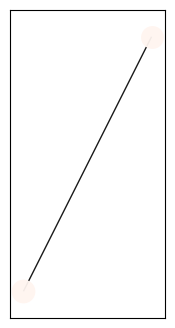

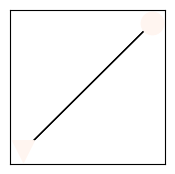

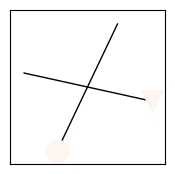

In [4]:
TREE,TREE2,N2T,N2T2,XScoreFile,LScoreFile,top,mavv,mavvstep,mivv,mivvstep,ps,psstep,tqdm,n,mg,mgstep,xs,xsstep,o,PERM,cpu,mdelta,match_tree,network,densitree,da = get_listvalue(myargs.values())
output = get_output(o)
notebook, Tqdm = TF_to_10(n, tqdm)
for ma in forlist(mavv[0], mavv[1], mavvstep):
    for mi in forlist(mivv[0], mivv[1], mivvstep):
        for p in forlist(ps[0], ps[1], psstep):
            for mgg in forlist(mg[0], mg[1], mgstep):
                for diffs in forlist(xs[0], xs[1], xsstep):
                    %run $mdelta $TREE $TREE2 -nt $N2T -nt2 $N2T2 -xsd $XScoreFile -lsd $LScoreFile -t $top -ma $ma -mi $mi -p $p -T $Tqdm -n $notebook -mg $mgg -x $diffs -o $output -P $PERM -c $cpu
                    if not PERM > 0:
                        mdelta_json = output + '{}_{}_top{}_diff{}_pv{}_miv{}_mav{}_mg{}.json'.format(os.path.basename(TREE).split('.')[0], os.path.basename(TREE2).split('.')[0], top, str(diffs),  str(p), str(mi), str(ma), str(mgg))
                        # !Rscript $match_tree $mdelta_json $XScoreFile $output $ma
                        %run $network $mdelta_json $output
                        # !Rscript $densitree $mdelta_json $output
                        # !Rscript $da $mdelta_json $output
print('mDELTA OK!!!')

In [5]:
%run $mdelta -h

usage: mDELTA [-h] [-nt [NAME2TYPEFILE]] [-nt2 [NAME2TYPEFILE2]]
              [-xsd [XSCOREDICTFILE]] [-lsd [LSCOREDICTFILE]] [-t TOP]
              [-ma MAV] [-mi MIV] [-p PV] [-T TQDM] [-n NOTEBOOK] [-P PERM]
              [-a ALG] [-c CPUS] [-o [OUTPUT]] [-mg MERGE] [-x DIFF]
              TreeSeqFile TreeSeqFile2

Multifuricating Developmental cEll Lineage Tree Alignment(mDELTA)

positional arguments:
  TreeSeqFile           [path/filename] A text file storing cell lineage tree
                        #1 in newick format. Tips can be labeled by name or
                        cell type. Branch lengths should be removed.
  TreeSeqFile2          [path/filename] A text file storing cell lineage tree
                        #2 in newick format. Tips can be labeled by name or
                        cell type. Branch lengths should be removed.

optional arguments:
  -h, --help            show this help message and exit
  -nt [NAME2TYPEFILE], --Name2TypeFile [NAME2TYPEFILE]
            